In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Assume you have loaded your dataset into a DataFrame `df`
df = pd.read_csv("CSV_Final_Project.csv")

# Simplify by focusing on key features and target
features = ['year', 'make', 'model', 'condition', 'odometer', 'color']  # Example feature set
target = 'sellingprice'

# Split data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming your DataFrame is loaded as df

# First, remove rows where the target variable 'sellingprice' is missing
df = df.dropna(subset=['sellingprice'])

# Define features and target variable
features = ['year', 'make', 'model', 'odometer', 'condition', 'color']  # Adjust based on your dataset
target = 'sellingprice'

# Split data into features (X) and target (y)
X = df[features]
y = df[target]

# Ensure all data in X for categorical columns is of type string to prevent mixed type issues
X = X.astype({'make': 'str', 'model': 'str', 'condition': 'str', 'color': 'str'})

# Define numerical and categorical features
numerical_features = ['year', 'odometer']
categorical_features = ['make', 'model', 'condition', 'color']

# Define preprocessing steps for numerical and categorical features
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with the preprocessor and a simple linear model
model = make_pipeline(preprocessor, SGDRegressor(max_iter=1000, tol=1e-3))

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae}")



Test MAE: 2.1621389852284528e+17


In [9]:
# Preprocessing for categorical data
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing', add_indicator=False),
    OneHotEncoder(handle_unknown='ignore')
)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv("CSV_Final_Project.csv")

# Remove rows where the target variable 'sellingprice' is missing
df_cleaned = df.dropna(subset=['sellingprice'])

# Define features and target variable
features = ['year', 'make', 'model', 'odometer', 'condition', 'color']  # Adjust based on your dataset specifics
target = 'sellingprice'

# Split data into features (X) and target (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Ensure all data in X for categorical columns is of type string to prevent mixed type issues
X[features] = X[features].astype(str)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical features
numeric_transformer = SimpleImputer(strategy='median')

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['year', 'odometer']),
        ('cat', categorical_transformer, ['make', 'model', 'condition', 'color'])
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', SGDRegressor(max_iter=1000, tol=1e-3))])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae}")


C:\Users\david\AppData\Local\Temp\ipykernel_26784\3044953718.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[features] = X[features].astype(str)


Test MAE: 4.7173168176509894e+17


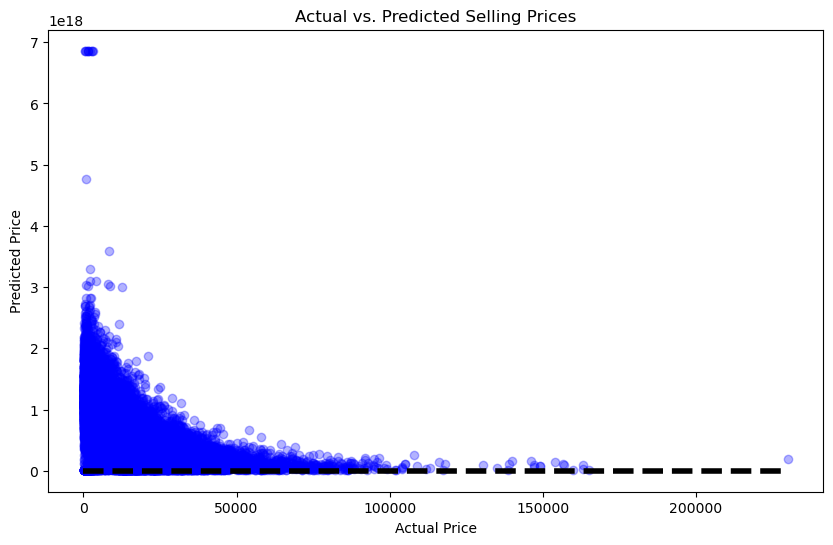

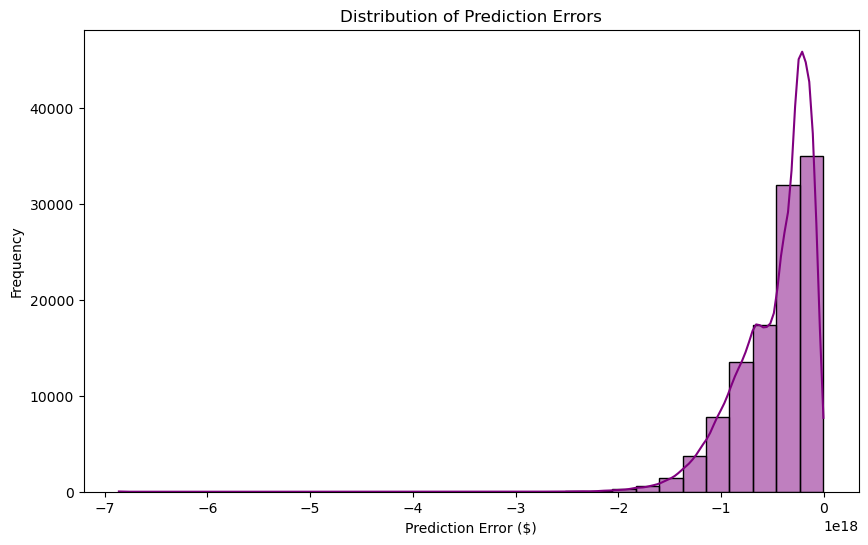

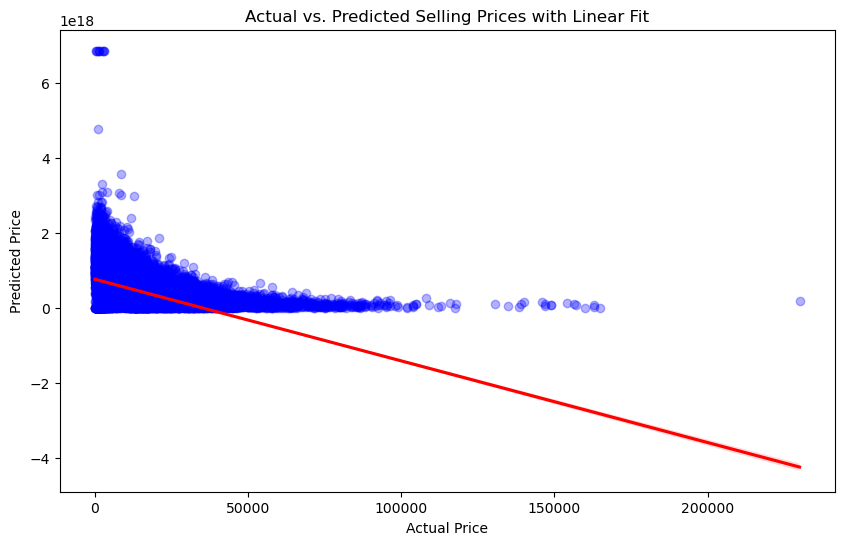

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Plotting Actual vs. Predicted Prices for a subset of the test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')  # Actual prices in blue
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Selling Prices')
plt.show()

# Plotting the error distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color='purple')  # Error distribution in purple for visibility
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

# Scatter plot with a linear fit line to show trends more clearly
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3, 'color': 'blue'}, line_kws={'color': 'red'})
# Here, actual prices are blue dots, and the linear fit line is red.
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Selling Prices with Linear Fit')
plt.show()


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create a synthetic dataset
np.random.seed(0)
data = {
    'Year': np.random.randint(2000, 2022, size=100),
    'Mileage': np.random.randint(0, 200000, size=100),
    'Make': np.random.choice(['Ford', 'Toyota', 'BMW'], size=100),
    'Price': np.random.randint(5000, 50000, size=100)
}

df = pd.DataFrame(data)

# Convert categorical data to numerical format
df = pd.get_dummies(df, columns=['Make'], drop_first=True)

# Display the first few rows of the dataset
print(df.head())


   Year  Mileage  Price  Make_Ford  Make_Toyota
0  2012    50624  38735          1            0
1  2015    40133  42138          0            1
2  2021    93790  46820          0            0
3  2000   186225  27571          1            0
4  2003    62756  38201          0            0


In [35]:
# Split the data into features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = model.predict(X_test)


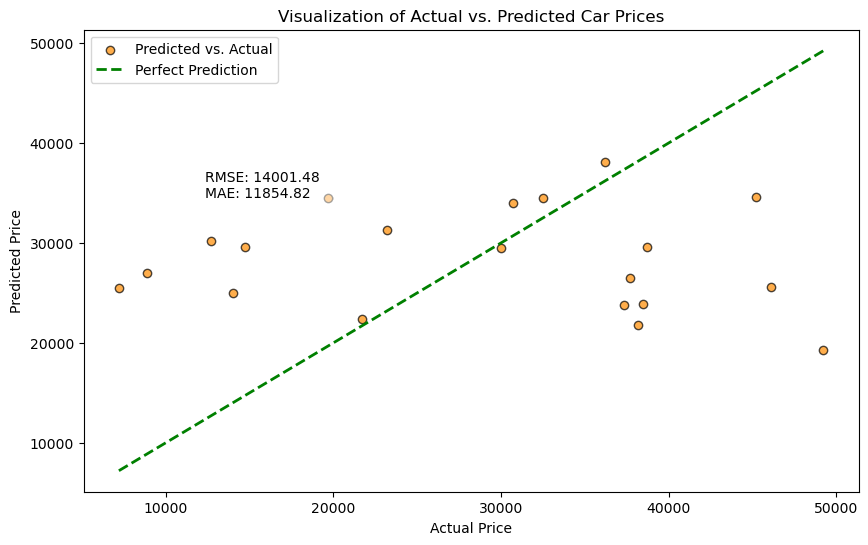

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Plotting Actual vs. Predicted Prices with enhancements
plt.figure(figsize=(10, 6))

# Scatter plot with improved color contrast
plt.scatter(y_test, y_pred, alpha=0.7, color='darkorange', edgecolor='black', label='Predicted vs. Actual')

# Perfect Prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=2, label='Perfect Prediction')

# Annotations for clarity using bbox for background padding
plt.text(x=np.percentile(y_test, 10), y=np.percentile(y_pred, 90), s=f"RMSE: {rmse:.2f}\nMAE: {mae:.2f}", 
         backgroundcolor='white', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=1'))

# Enhancing the plot
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Visualization of Actual vs. Predicted Car Prices')
plt.legend()

# Show the plot
plt.show()
